In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Current Food
current_food = pd.read_csv('current food.csv')
current_food.head(5)

,item,cost,calories per serving,servings left,week,cost per serving
0,Hot Dogs,6.99,170,7,1,0.436875
1,Hot Dog Buns,2.50,140,2,1,0.312500
2,Butter,4.00,100,32,1,0.125000
3,Condiments,10.00,1,1,1,10.000000
4,Rice,6.00,160,47,1,0.120000


In [19]:
# Ate Out
ate_out = pd.read_csv('ate out.csv')
ate_out.head(5)

,item,cost,week
0,boba,10.0,1
1,Sandwiches,0.1,1
2,strip steak,8.0,1
3,pizza,5.0,1
4,Paffles,10.0,1


### Budgeting

Week 1: $1.62 left
Week 2: $-35.24 left
Week 3: $-5.52 left
Week 4: $5.81 left


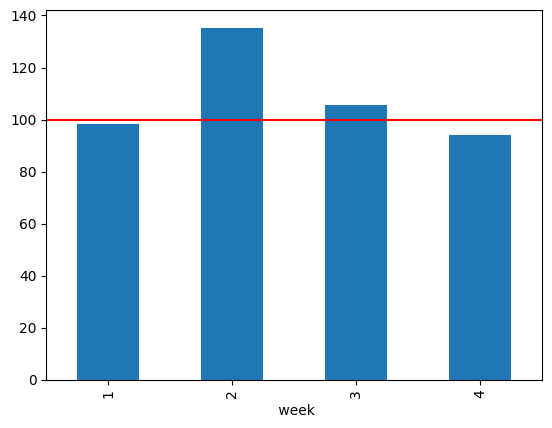

In [20]:
# Concat Current Food and Ate Out
food = pd.concat([current_food, ate_out], ignore_index=True, axis = 0)

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar')
weekly = food.groupby(' week')[' cost'].sum()

# Print Amount Under Budget
budget = 100
for i in range(1, len(weekly)+1):
    result = round(budget - weekly[i], 2)
    print("Week " + str(i) + ": $" + str(result) + " left")

# horizontal line
plt.axhline(y=100, color='r', linestyle='-')

### Calories

In [21]:
food['calories'] = food[' calories per serving'] * food[' servings left']
food.groupby(' week')['calories'].sum().head(5)


 week
1    12191.0
2     1410.0
3     5240.0
4    16490.0
Name: calories, dtype: float64

In [22]:
food.sort_values(by = 'calories', ascending=False).head(10)

,item,cost,calories per serving,servings left,week,cost per serving,calories
4,Rice,6.00,160.0,47.0,1,0.120000,7520.0
7,Marco & Lucas,30.00,500.0,10.0,4,3.000000,5000.0
2,Butter,4.00,100.0,32.0,1,0.125000,3200.0
20,Flour Tortillas,2.00,100.0,20.0,4,0.100000,2000.0
16,Potatoes,5.99,160.0,11.0,4,0.544545,1760.0
11,Caprisun,8.00,100.0,17.0,3,0.400000,1700.0
17,P.F Changs Dumplings,10.00,840.0,2.0,4,5.000000,1680.0
22,Beef,16.00,170.0,8.0,4,2.000000,1360.0
21,Ground Beef,16.00,170.0,8.0,4,2.000000,1360.0
19,Eggs,2.00,100.0,12.0,4,0.166667,1200.0


day,0,1,2,3,4,5,6
week,,,,,,,
1,NaN,2900.0,1960.0,2070.0,2330.0,2600.0,1800.0
2,2130.0,2000.0,2580.0,2800.0,3031.0,2100.0,2470.0
3,2390.0,2590.0,2800.0,2140.0,2220.0,1820.0,2000.0
4,950.0,NaN,NaN,NaN,NaN,NaN,NaN


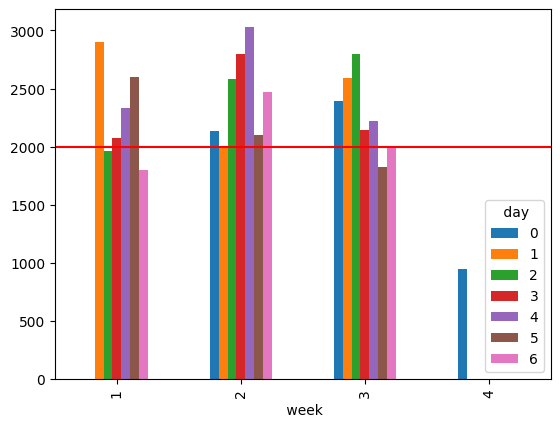

In [23]:
consumption = pd.read_csv('consumption.csv')
consumption.head(5)

import numpy as np
# pivot table of week and day
pivot = pd.pivot_table(consumption, values=' calories', index=[' week'],
                    columns=[' day'], aggfunc=np.sum)

# Plot Bar
pivot.plot(kind='bar')

#horizontal line at 2000
plt.axhline(y=2000, color='r', linestyle='-')

pivot.head(5)

### Master Plot

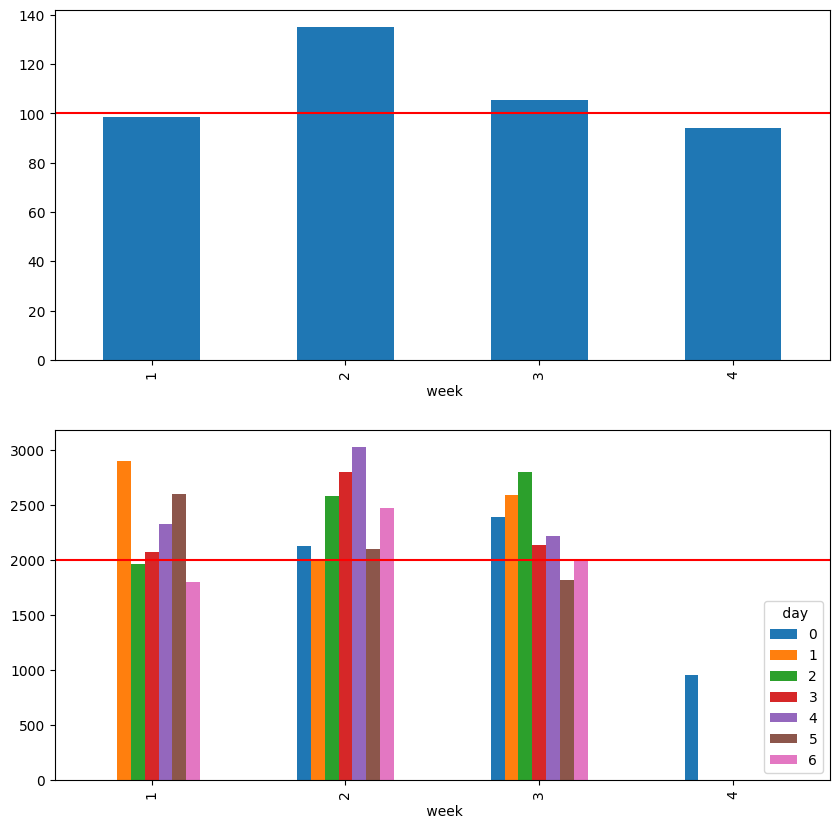

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar', ax=ax[0])
ax[0].axhline(y=100, color='r', linestyle='-')

# Plot Calories Per Week
pivot.plot(kind='bar', ax=ax[1])
ax[1].axhline(y=2000, color='r', linestyle='-')